<a href="https://colab.research.google.com/github/SyarifulMsth/predictive-analytics/blob/main/Predicting_Diamond_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics Portfolio Project: Case Study of Diamond Price Prediction💎

## Predictive Analytics Lifecycle (CRISP-DM):
- Business Understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment


### Business Understanding

Saya bekerja di sebuah perusahaan yang bergerak di bidang jual-beli diamonds (berlian). Model bisnis perusahaan tersebut adalah distributor dan retail, perusahaan membeli diamonds dari produsen kemudian menjualnya kepada konsumen. Perusahaan juga menerima penjualan kembali diamonds dari konsumen. Untuk efisiensi, perusahaan ingin menerapkan automasi pada sistem dalam memprediksi harga diamonds dengan teknik predictive modelling.


Perusahaan akan mengembangkan sebuah sistem prediksi harga diamonds untuk menjawab permasalahan berikut.

Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap harga diamonds? Berapa harga pasar diamonds dengan karakteristik atau fitur tertentu?
Untuk menjawab pertanyaan tersebut, maka diperlukan predictive modelling dengan tujuan atau goals sebagai berikut:

- Mengetahui fitur yang paling berkorelasi dengan harga diamonds.
- Membuat model machine learning yang dapat memprediksi harga diamonds seakurat mungkin berdasarkan fitur-fitur yang ada.


### Data Understanding

In [1]:
# Data loading
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Terdapat informasi yang diperoleh dari output di atas:
- Ada 53.940 baris (records atau jumlah pengamatan) dalam dataset.
- Ada 10 kolom yaitu: carat, cut, color, clarity, depth, table, price, x, y, z.

In [3]:
# Exploratory Data Analysis - Deskripsi Variabel
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Deskripsi Variabel**

Harga dalam dolar Amerika Serikat ($) adalah fitur target.

* carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
* cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
* color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
* clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
* x: merepresentasikan panjang diamonds dalam mm (0-10.74).
* y: merepresentasikan lebar diamonds dalam mm (0-58.9).
* z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
* depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
* table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).



Dari output terlihat bahwa:

* Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
* Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
* Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Handling missing value
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [6]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [7]:
# Drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape

(53920, 10)

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='carat'>

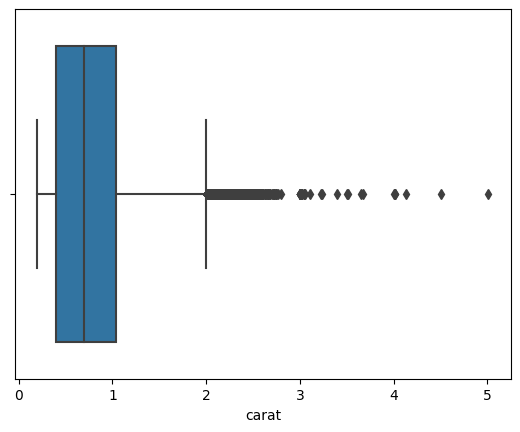

In [13]:
# data visualization boxplot outliers
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

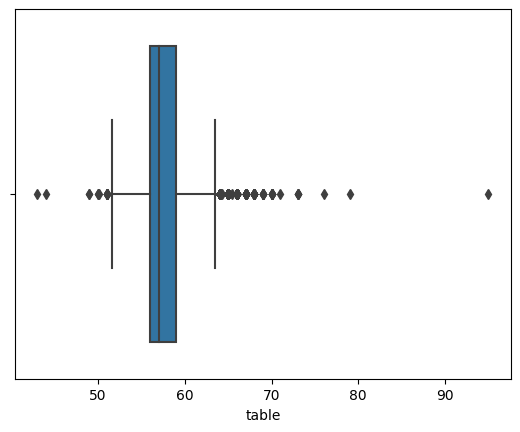

In [14]:
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

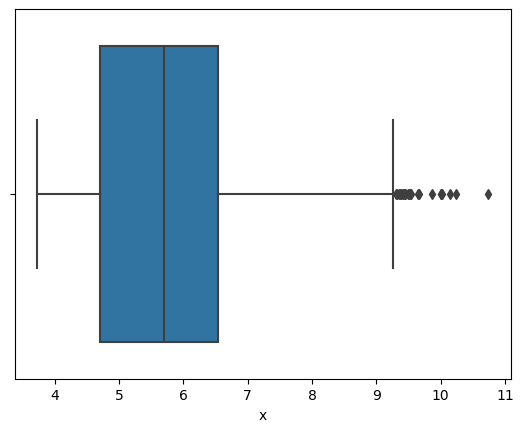

In [15]:
sns.boxplot(x=diamonds['x'])

In [17]:
# handling outliers with IQR method
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

<ipython-input-17-4210117c6619>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-17-4210117c6619>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-17-4210117c6619>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(45864, 10)

In [18]:
# Univariate Analysis
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

           jumlah sampel  persentase
Ideal              19820        43.2
Premium            11545        25.2
Very Good          10599        23.1
Good                3637         7.9
Fair                 263         0.6


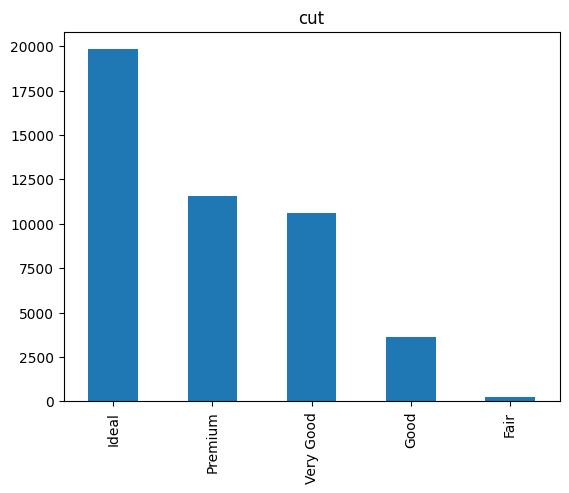

In [19]:
# Categorical Features

## Fitur Cut
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

   jumlah sampel  persentase
G           9725        21.2
E           8657        18.9
F           8173        17.8
H           6852        14.9
D           6004        13.1
I           4278         9.3
J           2175         4.7


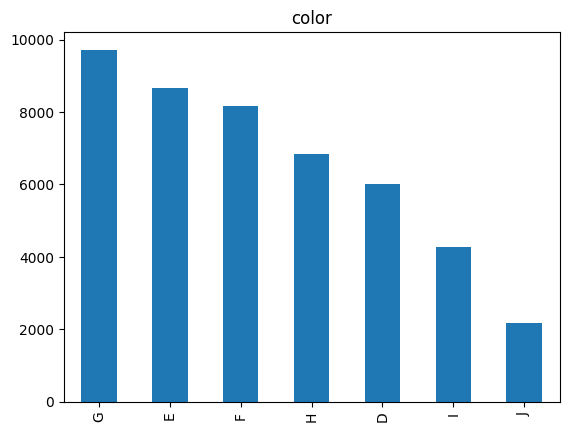

In [20]:
## Fitur Color
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J, I, H, G, F, E, dan D. Dari grafik di atas, dapat disimpulkan bahwa sebagian besar grade berada pada grade menengah, yaitu G, F, H.

      jumlah sampel  persentase
SI1           11138        24.3
VS2           10592        23.1
SI2            7156        15.6
VS1            7135        15.6
VVS2           4463         9.7
VVS1           3329         7.3
IF             1592         3.5
I1              459         1.0


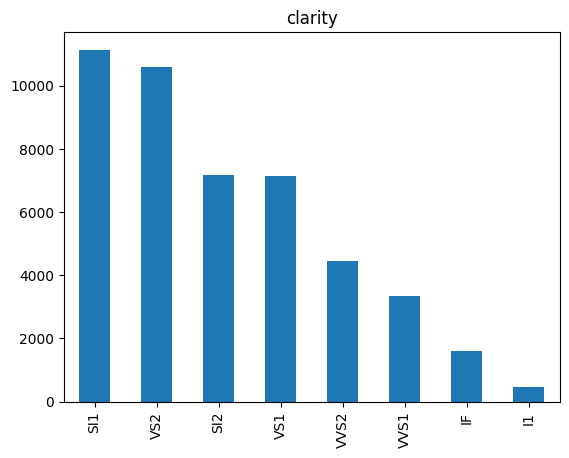

In [21]:
## Fitur Clarity
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

'IF' - Internally Flawless
'VVS2' - Very Very Slight Inclusions
'VVS1' - Very Very Slight Inclusions
'VS1' - Very Slight Inclusions
'VS2' - Very Slight Inclusions
'SI2' - Slight Inclusions
'SI1' - Slight Inclusions
'I1' - Imperfect

Dari grafik bisa disimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

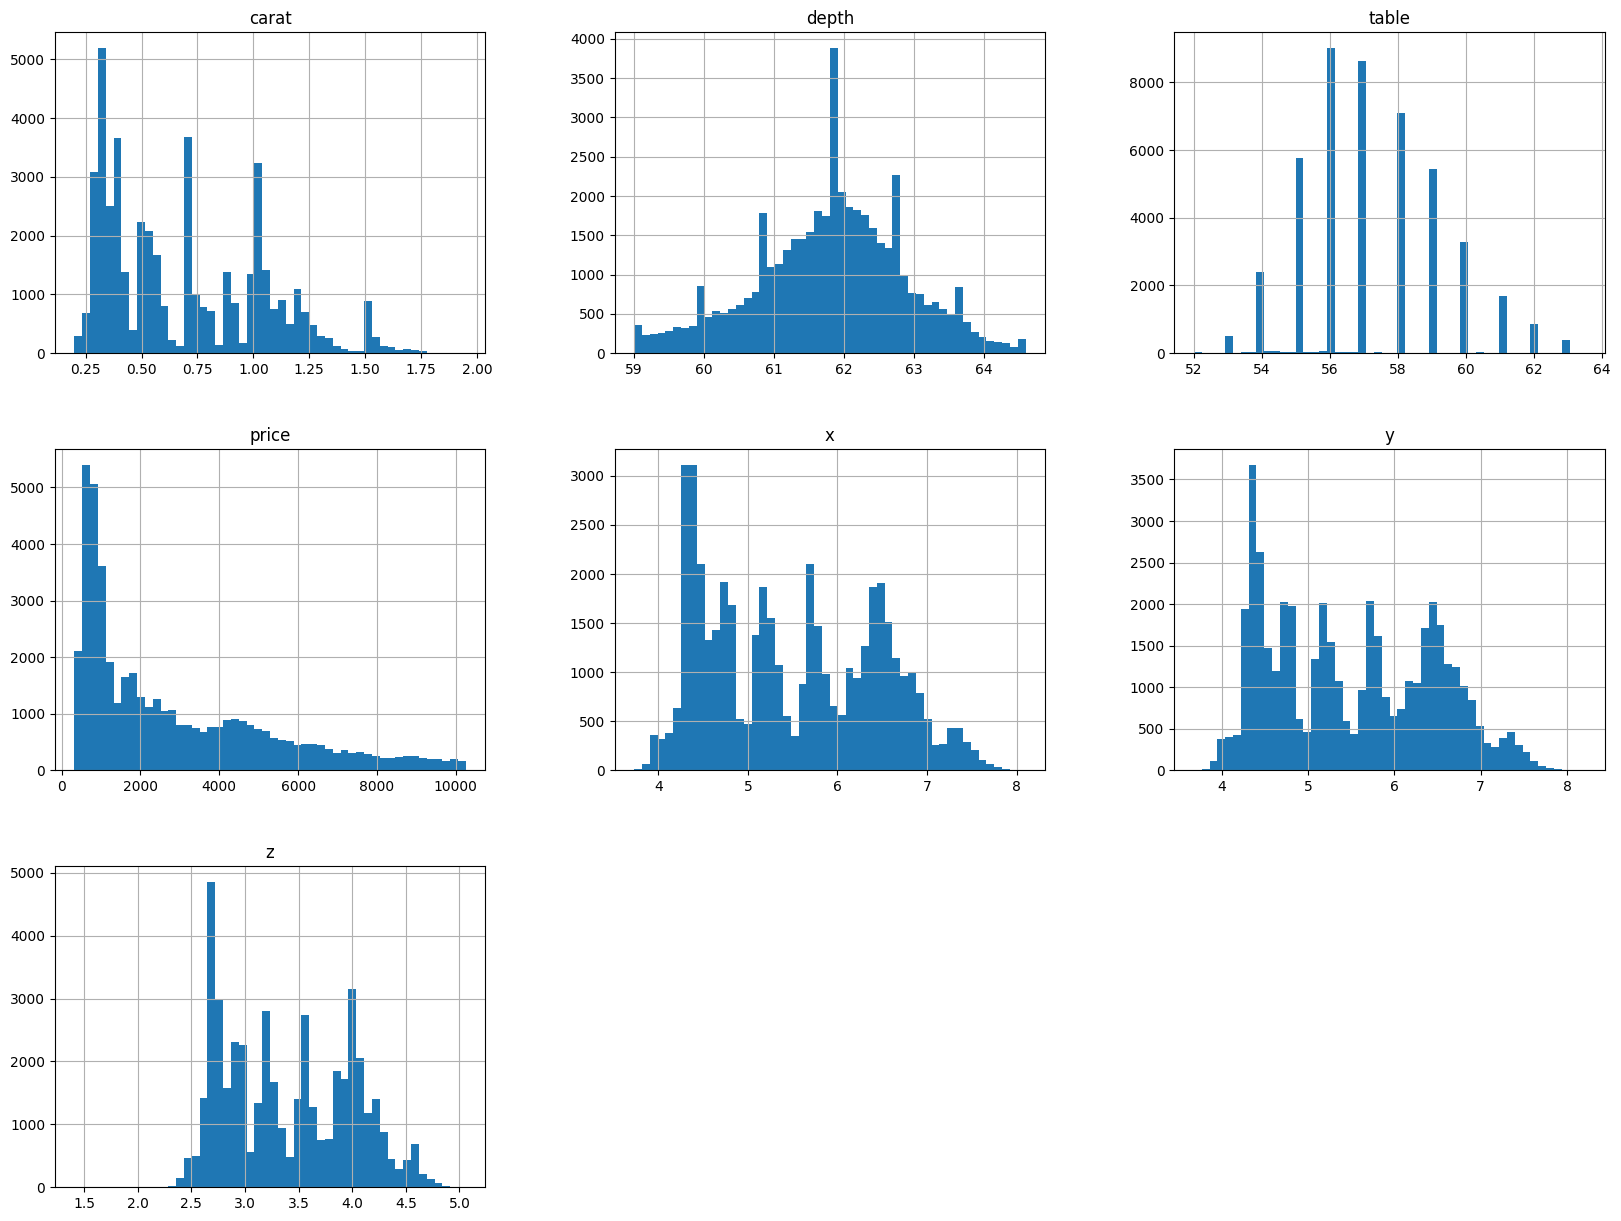

In [22]:
# Numerical Features
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data kita. Dari histogram "price", bisa diperoleh beberapa informasi, antara lain:

- Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dilihat dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).

- Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.

- Setengah harga berlian bernilai di bawah $2500. Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Data Preparation